In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob

In [2]:
def get_one_shift(fft_dir, omega_dir):
    print(fft_dir, omega_dir)
    fft = np.load(fft_dir)
    omega = np.load(omega_dir)
    fft_half = fft[fft.shape[0]//2:]
    omega_half = omega[fft.shape[0]//2:]

    idx_max = np.argmax(fft_half)
    omega_max = omega_half[idx_max]
    fft_max = fft_half[idx_max]
    # plt.plot(omega_half, fft_half)
    # plt.yscale('log')
    # plt.plot(omega_max, fft_max, 'ro')

    print('omega_max = ', omega_max)
    print('fft_max = ', fft_max)
    return omega_max, fft_max

In [4]:
before_angles = {}
after_angles = {}
runs = [f"{i}run" for i in range(13, 19)]
for run in runs:
    before_angles[run] = []
    after_angles[run] = []
    np_files = glob.glob(f'output_data/{run}*.npy')
    np_files.sort()
    for i in [0, 3]:
        omega_max, fft_max = get_one_shift(np_files[i], np_files[i+6])
        before_angles[run].append(omega_max)

    for i in [1, 4]:
        omega_max, fft_max = get_one_shift(np_files[i], np_files[i+6])
        after_angles[run].append(omega_max)

output_data/13run_fft_x_0.npy output_data/13run_omega_x_0.npy
omega_max =  1.1725075362760826
fft_max =  1.0
output_data/13run_fft_y_0.npy output_data/13run_omega_y_0.npy
omega_max =  1.1725075362760826
fft_max =  1.0
output_data/13run_fft_x_1.npy output_data/13run_omega_x_1.npy
omega_max =  1.1725075362760826
fft_max =  1.0
output_data/13run_fft_y_1.npy output_data/13run_omega_y_1.npy
omega_max =  1.1725075362760826
fft_max =  1.0
output_data/14run_fft_x_0.npy output_data/14run_omega_x_0.npy
omega_max =  1.4584849841482992
fft_max =  1.0
output_data/14run_fft_y_0.npy output_data/14run_omega_y_0.npy
omega_max =  1.4584849841482992
fft_max =  1.0
output_data/14run_fft_x_1.npy output_data/14run_omega_x_1.npy
omega_max =  1.4584849841482992
fft_max =  1.0
output_data/14run_fft_y_1.npy output_data/14run_omega_y_1.npy
omega_max =  1.4584849841482992
fft_max =  1.0
output_data/15run_fft_x_0.npy output_data/15run_omega_x_0.npy
omega_max =  1.3676127903124247
fft_max =  1.0
output_data/15run_f

In [5]:
before_angles

{'13run': [1.1725075362760826, 1.1725075362760826],
 '14run': [1.4584849841482992, 1.4584849841482992],
 '15run': [1.3676127903124247, 1.3676127903124247],
 '16run': [1.567751247431314, 1.567751247431314],
 '17run': [1.100761514153902, 1.100761514153902],
 '18run': [1.0340486951142722, 1.0340486951142722]}

In [6]:
after_angles

{'13run': [1.1725075362760826, 1.1725075362760826],
 '14run': [1.4584849841482992, 1.4584849841482992],
 '15run': [1.3008999712727949, 1.3008999712727949],
 '16run': [1.5010384283916842, 1.5010384283916842],
 '17run': [1.0340486951142722, 1.0340486951142722],
 '18run': [0.9673358760746424, 1.0340486951142722]}

In [7]:
average_before = np.array([np.mean(v) for k, v in before_angles.items()])
average_after = np.array([np.mean(v) for k, v in after_angles.items()])
angles = np.array([30, 45, 40, 50, 20, 10])
average_before, average_after

(array([1.17250754, 1.45848498, 1.36761279, 1.56775125, 1.10076151,
        1.0340487 ]),
 array([1.17250754, 1.45848498, 1.30089997, 1.50103843, 1.0340487 ,
        1.00069229]))

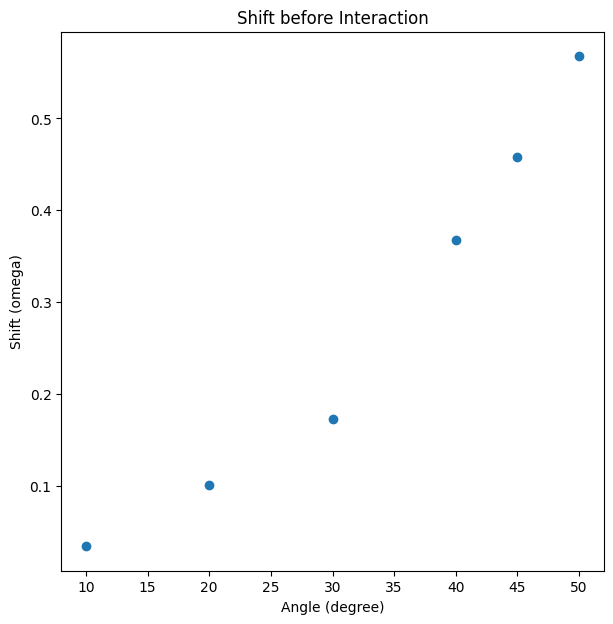

In [8]:
plt.figure(figsize=(7, 7))
plt.plot(angles, average_before-1, 'o')
plt.xlabel('Angle (degree)')
plt.ylabel('Shift (omega)')
plt.title('Shift before Interaction')
plt.show()

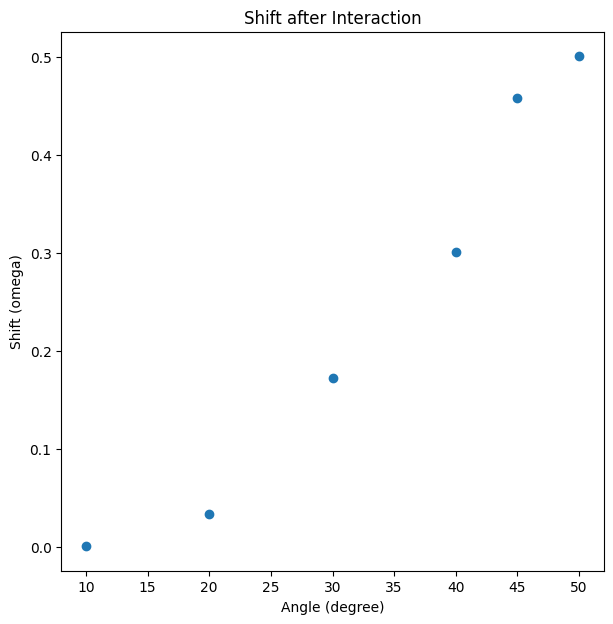

In [9]:
plt.figure(figsize=(7, 7))
plt.plot(angles, average_after-1, 'o')
plt.xlabel('Angle (degree)')
plt.ylabel('Shift (omega)')
plt.title('Shift after Interaction')
plt.show()

In [10]:
class CurveFitting:
    """
    A class to implement mth order polynomial regression using the least squares method.

    Use the `fit` method to fit the model. Then predict the Y values given X values using\\
    the `predict` method.

    """

    def __init__(self) -> None:
        self.beta = None
        self.stats = None

    def fit(self, X, Y, order=3, plot=False, stats=True):
        """
        Polynomial regression of order m using least squares method.

        Parameters
        ----------
        X : array_like
            Independent variable.
        Y : array_like
            Dependent variable.
        order : int, optional
            Order of the polynomial. Default is 3.
        plot : bool, optional
            If True, plot the regression line. Default is True.
        statistics : bool, optional
            If True, return the statistics. Default is True.

        Returns
        -------
        beta : array_like
            Coefficients of the polynomial regression model.
        stats : dict
            Statistics of the polynomial regression model.
            `r2` : square of correlation coefficient
            `syx` : standard error of the estimate
        """
        self.n = len(X)
        Xis = np.zeros(2 * order + 1)
        Yis = np.zeros(order + 1)
        for i in range(0, 2 * order + 1):
            if i == 0:
                Xis[i] = self.n
                continue
            xi = np.sum(X**i)
            Xis[i] = xi

        for i in range(1, order + 2):
            yi = np.sum(Y * (X ** (i - 1)))
            Yis[i - 1] = yi
        A = np.zeros((order + 1, order + 1))
        for i in range(0, order + 1):
            A[i] = Xis[i : i + order + 1]
        beta = np.linalg.solve(A, Yis)
        self.beta = beta

        if plot:
            X_l = np.linspace(np.min(X) - np.std(X), np.max(X) + np.std(X), 100)

            def predict(X_l):
                Y_l = 0
                for i in range(0, order + 1):
                    Y_l += beta[i] * X_l**i
                return Y_l

            Y_l = predict(X_l)
            plt.figure(figsize=(10, 8))
            plt.scatter(X, Y)
            plt.plot(X_l, Y_l, "r")
            plt.xlim(np.min(X) - np.std(X), np.max(X) + np.std(X))
            plt.ylim(np.min(Y) - np.std(Y), np.max(Y) + np.std(Y))
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.show()

        if stats:
            ymean = np.mean(Y)
            y_pred = self.predict(X)
            Sr = np.sum((Y - y_pred) ** 2)
            SYX = np.sqrt(Sr / (self.n - order - 1))
            # r2
            r2 = (np.sum((Y - ymean) ** 2) - Sr) / (np.sum((Y - ymean) ** 2))
            stats = {"r2": r2, "syx": SYX}
            self.stats = stats
            return beta, stats
        else:
            return beta

    def predict(self, X_l):
        """
        Predict the Y values given X values.

        Parameters
        ----------
        X_l : array_like
            Independent variable.

        Returns
        -------
        Y_l : array_like
            Predicted Y values.
        """
        Y_l = np.zeros(len(X_l))
        for i in range(0, len(self.beta)):
            Y_l += self.beta[i] * X_l**i
        return Y_l

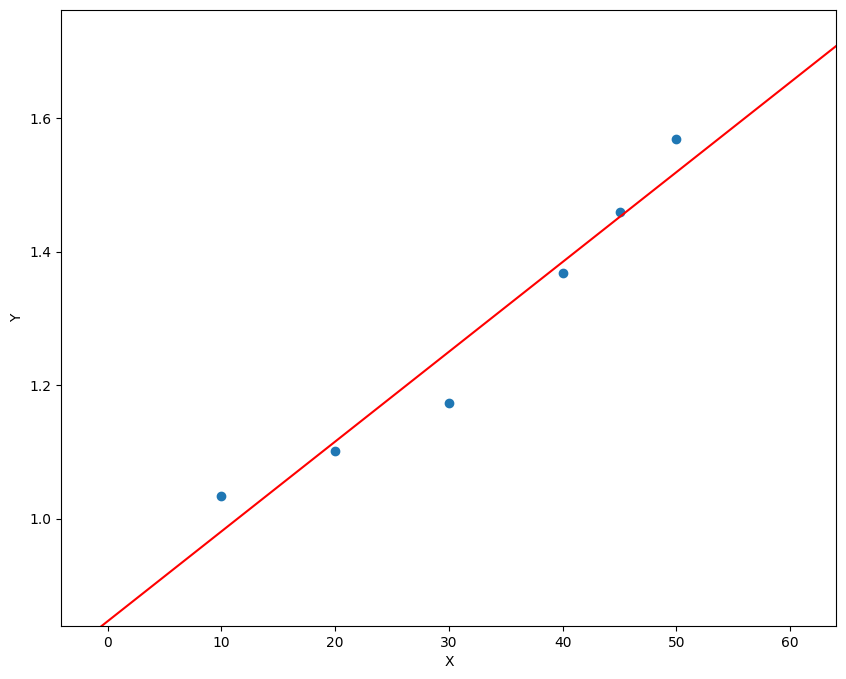

(array([0.84653836, 0.01344583]),
 {'r2': 0.9481362705419994, 'syx': 0.054183977304192124})

In [18]:
cf = CurveFitting()
cf.fit(angles, average_before, order=1, plot=True, stats=True)

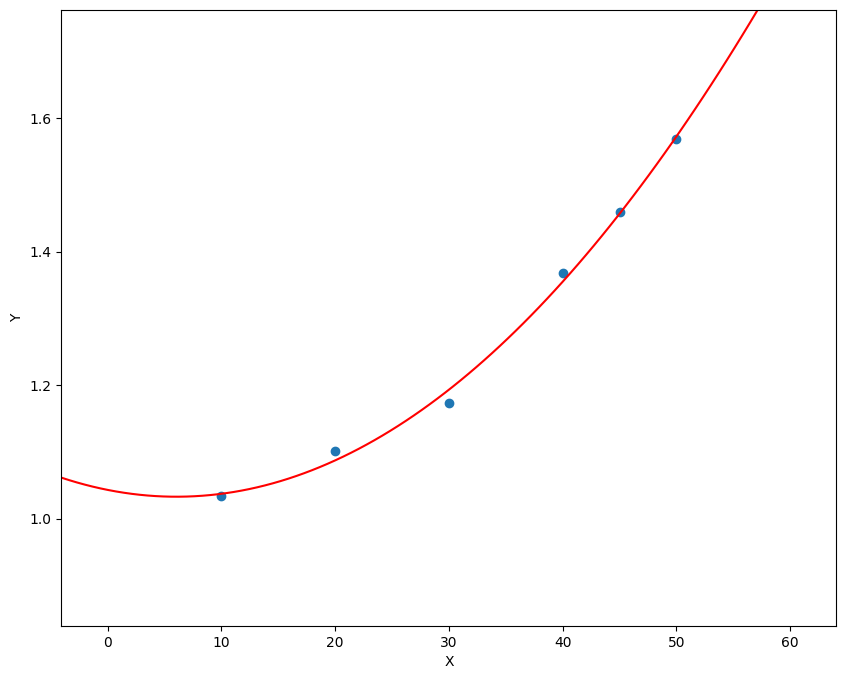

(array([ 1.04311617e+00, -3.37222263e-03,  2.79076835e-04]),
 {'r2': 0.996441711387074, 'syx': 0.01638811348944532})

In [17]:
cf = CurveFitting()
cf.fit(angles, average_before, order=2, plot=True, stats=True)

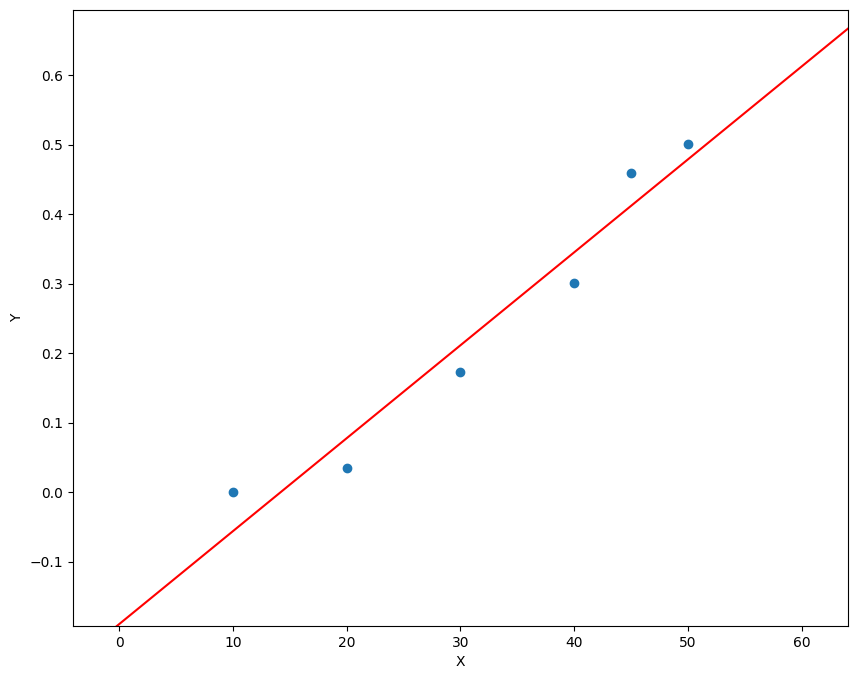

(array([-0.19009517,  0.0133756 ]),
 {'r2': 0.9497291142506491, 'syx': 0.05302230857348474})

In [14]:
cf.fit(angles, average_after-1, order=1, plot=True, stats=True)

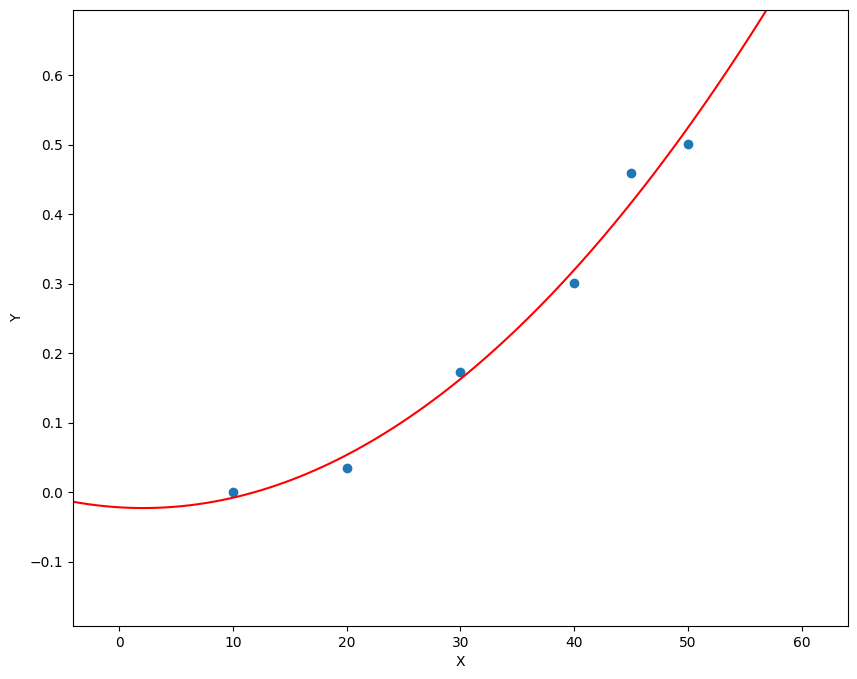

(array([-0.02198821, -0.00100665,  0.00023866]),
 {'r2': 0.9854873230485853, 'syx': 0.032896030565767974})

In [15]:
cf.fit(angles, average_after-1, order=2, plot=True, stats=True)